# Import Libraries I will use

In [1]:
import pandas as pd
import numpy as np

# Read Cvs

In [2]:
df = pd.read_csv("VolumeAndNVbySymbol_wRand.csv")

# The average value of each numerical column
But firstly we need to know datatypes of columns

In [3]:
df.dtypes

Time            object
SYMBOL_NAME     object
NV_rand        float64
VOLUME_rand    float64
dtype: object

# 1) We need to find averages of NV_rand * VOLUME_rand

In [4]:
df['VOLUME_rand * NV_rand']=df['NV_rand']*df['VOLUME_rand']

In [5]:
WeightedAverage=(df['VOLUME_rand * NV_rand']).sum()/df['NV_rand'].sum()

In [6]:
WeightedAverage

932572.8790457677

# 2) We need to sort them so it will be easy to eliminate first %5, last %5

In [7]:
Sorted_df=df.sort_values(by='VOLUME_rand', ascending=True)

In [8]:
NumberOfRows=len(df)
NumberOfRows

643214

In [9]:
NumberOfElements = NumberOfRows - int(NumberOfRows*0.05)

In [10]:
HighestAverage = Sorted_df.tail(NumberOfElements)['VOLUME_rand * NV_rand'].sum()/Sorted_df.tail(NumberOfElements)['NV_rand'].sum()
i=NumberOfRows
while i>= NumberOfElements:
    isHighestAverage = Sorted_df.tail(i)['VOLUME_rand * NV_rand'].sum()/Sorted_df.tail(i)['NV_rand'].sum()
    if isHighestAverage > HighestAverage:
        HighestAverage = isHighestAverage
    i-=1

In [11]:
HighestAverage

932577.4895261422

In [12]:
LowestAverage = Sorted_df.head(NumberOfElements)['VOLUME_rand * NV_rand'].sum()/Sorted_df.head(NumberOfElements)['NV_rand'].sum()
i=NumberOfRows
while i>= NumberOfElements:
    isLowestAverage = Sorted_df.head(i)['VOLUME_rand * NV_rand'].sum()/Sorted_df.head(i)['NV_rand'].sum()
    if isLowestAverage < LowestAverage:
        LowestAverage = isLowestAverage
    i-=1

In [13]:
LowestAverage

46119.07234708963

<AxesSubplot:>

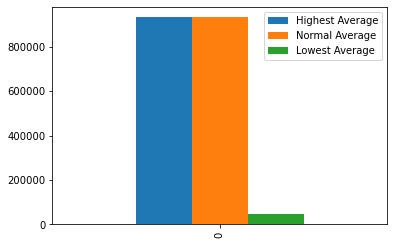

In [14]:
forGraph = pd.DataFrame({'Highest Average':[HighestAverage],
                       'Normal Average':[WeightedAverage],
                     'Lowest Average':[LowestAverage]})
forGraph.plot.bar()

# Distance of normal to lowest is high. Distance of highest to normal is low because this series in that point has dense.

<AxesSubplot:>

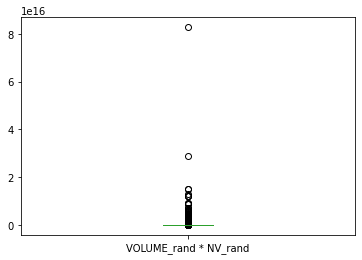

In [29]:
df['VOLUME_rand * NV_rand'].plot.box()

# 3) We need to do someting complex 

In [15]:
GroupedByDf=df.groupby(['SYMBOL_NAME']).sum()

In [16]:
GroupedByDf['AveragePerSymbol']=GroupedByDf['VOLUME_rand * NV_rand']/GroupedByDf['NV_rand']

In [17]:
GroupedByDf['Relaitive Weight']=GroupedByDf['AveragePerSymbol']*100/GroupedByDf['AveragePerSymbol'].sum()


In [18]:
GroupedByDf.head()

,NV_rand,VOLUME_rand,VOLUME_rand * NV_rand,AveragePerSymbol,Relaitive Weight
SYMBOL_NAME,,,,,
NYSE_TAQ::A,4.184778e+08,2442713.0,2.471326e+13,59055.131443,0.008920
NYSE_TAQ::AA,1.060374e+09,23031099.0,4.260295e+14,401772.994139,0.060688
NYSE_TAQ::AAA,1.777193e+04,704.0,3.842901e+06,216.234284,0.000033
NYSE_TAQ::AAAU,6.144971e+06,354145.0,8.690815e+10,14142.972351,0.002136
NYSE_TAQ::AAC,4.621008e+06,483412.0,7.063531e+11,152856.937705,0.023089


# I couldn't understand , "do you get the same result as 1? Discuss why or why not." But I am sure that usually averages are not same each other because all Symbol has different value If you mean that, i did sum of w*x is 1.

# So Answers

In [19]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [20]:
print("1)The weighted average of VOLUME_rand over the whole dataset, using NV_rand as the weights :"+str(WeightedAverage))
print("2)The averages of values :")
print("\t Highest: \t"+str(HighestAverage))
print("\t Lowest: \t"+str(LowestAverage))
print("3)The weighted average of VOLUME_rand over the whole dataset, using NV_rand as the weights for each Symbol:\n\n\n", GroupedByDf[['AveragePerSymbol','Relaitive Weight']])
print("Sum of all Relaitive Weight always is 1 because its mechanism. Sum =",GroupedByDf['Relaitive Weight'].sum()/100)

1)The weighted average of VOLUME_rand over the whole dataset, using NV_rand as the weights :932572.8790457677
2)The averages of values :
	 Highest: 	932577.4895261422
	 Lowest: 	46119.07234708963
3)The weighted average of VOLUME_rand over the whole dataset, using NV_rand as the weights for each Symbol:


                      AveragePerSymbol  Relaitive Weight
SYMBOL_NAME                                            
NYSE_TAQ::A          59055.1314426828      0.0089202638
NYSE_TAQ::AA        401772.9941388383      0.0606877170
NYSE_TAQ::AAA          216.2342842948      0.0000326621
NYSE_TAQ::AAAU       14142.9723506296      0.0021362927
NYSE_TAQ::AAC       152856.9377050340      0.0230890048
NYSE_TAQ::AACG        7238.0319643196      0.0010933030
NYSE_TAQ::AACIU     973137.2645316697      0.1469921567
NYSE_TAQ::AACU        5961.0876396749      0.0009004209
NYSE_TAQ::AACWS      14550.5316017357      0.0021978544
NYSE_TAQ::AADI        1794.7628198689      0.0002710985
NYSE_TAQ::AADR       

# The END

# I taught it can be solved by greedy knapsnack algorithm because we want to make weight high, weight*xi low for smallest mean but it doesn't work, you can see my some test below. ahahahahha

In [21]:
df1=df.copy()

In [22]:
df1['x']=df1['VOLUME_rand']
Sorted_df1=df1.sort_values(by='x', ascending=True)
NumberOfElements1 = NumberOfRows - int(NumberOfRows*0.05)
HighestAverage1 = Sorted_df1.head(NumberOfElements)['VOLUME_rand * NV_rand'].sum()/Sorted_df1.head(NumberOfElements)['NV_rand'].sum()
LowestAverage1 = Sorted_df1.tail(NumberOfElements)['VOLUME_rand * NV_rand'].sum()/Sorted_df1.tail(NumberOfElements)['NV_rand'].sum()
[LowestAverage1,HighestAverage1]

[932577.4895261422, 46119.07234708963]

In [23]:
df1['x']=df1['NV_rand']
Sorted_df1=df1.sort_values(by='x', ascending=True)
NumberOfElements1 = NumberOfRows - int(NumberOfRows*0.05)
HighestAverage1 = Sorted_df1.head(NumberOfElements)['VOLUME_rand * NV_rand'].sum()/Sorted_df1.head(NumberOfElements)['NV_rand'].sum()
LowestAverage1 = Sorted_df1.tail(NumberOfElements)['VOLUME_rand * NV_rand'].sum()/Sorted_df1.tail(NumberOfElements)['NV_rand'].sum()
[LowestAverage1,HighestAverage1]

[932574.3588775287, 66218.77844197325]

In [24]:
df1['x']=df1['NV_rand']/df1['VOLUME_rand']
Sorted_df1=df1.sort_values(by='x', ascending=True)
NumberOfElements1 = NumberOfRows - int(NumberOfRows*0.05)
HighestAverage1 = Sorted_df1.head(NumberOfElements)['VOLUME_rand * NV_rand'].sum()/Sorted_df1.head(NumberOfElements)['NV_rand'].sum()
LowestAverage1 = Sorted_df1.tail(NumberOfElements)['VOLUME_rand * NV_rand'].sum()/Sorted_df1.tail(NumberOfElements)['NV_rand'].sum()
[LowestAverage1,HighestAverage1]

[930893.2075181985, 774977.618310532]

In [25]:
df1['x']=df1['VOLUME_rand']/df1['NV_rand']
Sorted_df1=df1.sort_values(by='x', ascending=True)
NumberOfElements1 = NumberOfRows - int(NumberOfRows*0.05)
HighestAverage1 = Sorted_df1.head(NumberOfElements)['VOLUME_rand * NV_rand'].sum()/Sorted_df1.head(NumberOfElements)['NV_rand'].sum()
LowestAverage1 = Sorted_df1.tail(NumberOfElements)['VOLUME_rand * NV_rand'].sum()/Sorted_df1.tail(NumberOfElements)['NV_rand'].sum()
[LowestAverage1,HighestAverage1]

[774977.6183105317, 930893.207518199]

In [26]:
df1['x']=df1['VOLUME_rand']/df1['NV_rand'].sum() #OH MY GOD, BLESSING NOW This is like same normal volume :)
Sorted_df1=df1.sort_values(by='x', ascending=True)
NumberOfElements1 = NumberOfRows - int(NumberOfRows*0.05)
HighestAverage1 = Sorted_df1.head(NumberOfElements)['VOLUME_rand * NV_rand'].sum()/Sorted_df1.head(NumberOfElements)['NV_rand'].sum()
LowestAverage1 = Sorted_df1.tail(NumberOfElements)['VOLUME_rand * NV_rand'].sum()/Sorted_df1.tail(NumberOfElements)['NV_rand'].sum()
[LowestAverage1,HighestAverage1]

[932577.4895261422, 46119.07234708963]

In [27]:
print("\t Highest: \t"+str(HighestAverage))
print("\t Lowest: \t"+str(LowestAverage))

	 Highest: 	932577.4895261422
	 Lowest: 	46119.07234708963
